Importing Libraries

In [69]:
import numpy as np #make array
import pandas as pd #import dataset and make dataframe
import matplotlib.pyplot as plt #to create the plots and graph
import seaborn as sns #same as matplotlib
from sklearn.model_selection import train_test_split  #training and testing split
from xgboost import XGBRegressor 
from sklearn import metrics #to evaluate the model

Data Collection and Processing

In [70]:
#loading the data from csv file to pandas
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [71]:
exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


Calories burnt during different exercises so if we see the data the heart rate tells the type of exercise done by the person

In [72]:
#combinig both data frames
calories_data = pd.concat([exercise,calories['Calories']], axis=1) #only calories column is needed
# axis = 1 means that in pandas columns are represented through 1 and rows by 0. in this case we have to join the dataframe column wise so here we use the axis = 1 

In [73]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [74]:
# Checking the number of rows and columns
calories_data.shape

(15000, 9)

In [75]:
#getting information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [76]:
#checking for some missing values
#isnull represents missing values
calories_data.isnull().sum()
# the result represents that we donot have any missing values in our data set if we have any misssing value we have to preprocess it and then represents the result

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Statistical Analysis on Dataset

In [77]:
# get statistical data about the data such as range, mean, max, min
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Visualize the Data

In [78]:
#it creates some midlines in ploting the data, some background
sns.set()

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

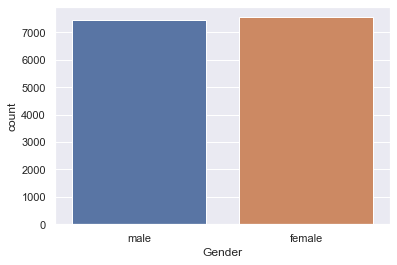

In [79]:
#draw some columns from our data except user id
#plotting gender column in count plot
#count plot is the categorical plot which contains two values such as in gender(Male or Female)
sns.countplot(calories_data['Gender'])
#as the points are nearly equally distributed so a very good dataset

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

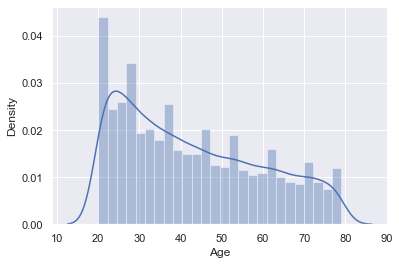

In [80]:
# Now for other columns we cannot use count plot but instead we use distribution plot
# finding the distribution of age column
sns.distplot(calories_data['Age'])
#density represents peak which means how much more data is under which figure such as more values under 20

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

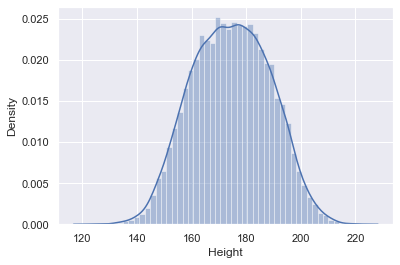

In [81]:
#distribution of height column
sns.distplot(calories_data['Height'])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

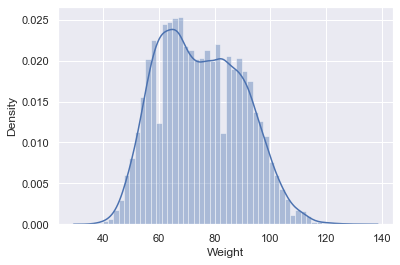

In [82]:
#distribution of weight column
sns.distplot(calories_data['Weight'])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

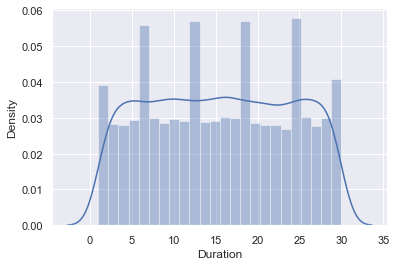

In [83]:
#distribution of duration column
sns.distplot(calories_data['Duration'])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

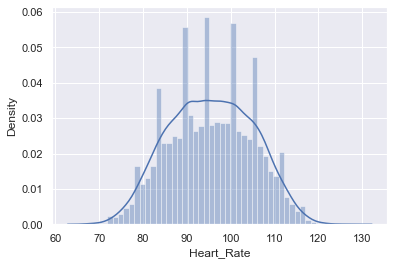

In [84]:
#distribution of heart_rate column
sns.distplot(calories_data['Heart_Rate'])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

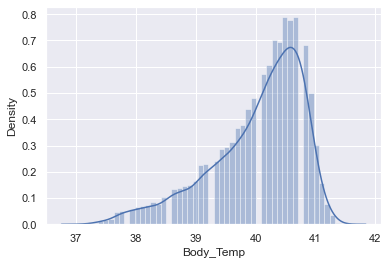

In [85]:
#distribution of body_temp column
sns.distplot(calories_data['Body_Temp'])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

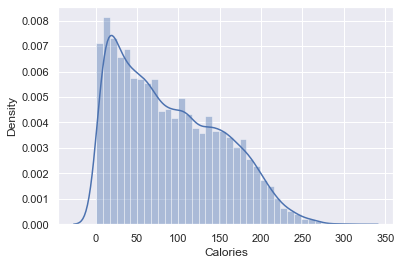

In [86]:
#distribution of calories column
sns.distplot(calories_data['Calories'])

Finding the Correlations in the DataSet
1. Positive Correlation (Direct relation such as more duration more calories burnt)
2. Negative Correlations (Inverse relations)

In [87]:
#corr will use to find corelation values
corelations = calories_data.corr()

<AxesSubplot:>

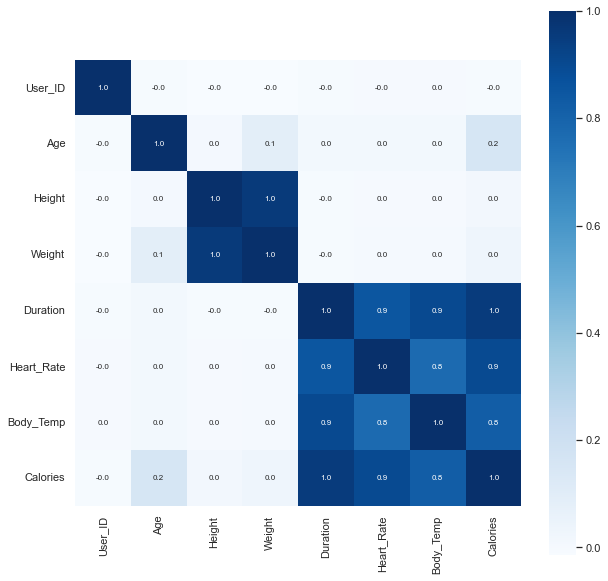

In [88]:
# constructing a heatmap to understand the correlations
# 10,10 is size of figure
plt.figure(figsize=(10,10))
sns.heatmap(corelations, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#heatmap give colours based on values
#We have each columns on y-axis as well as on x-axis so the computation will be based on comparison of each column with itself and with other
#0 represents no correlation as the correlation increase the colour becomes intense

In [89]:
#in our dataframe all the values are numerical instead of Gender column so we have to compute it first numerically
# thatswhy the gender column is not included during statistical analysis of data

Convert all the values in Dataset to Numerical ones

In [90]:
#inplace parameter represents permananat change
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [91]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


Sepearte the Features and Targets 

In [92]:
x=calories_data[["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp"]]
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190,94,29,105,40.8
1,1,20,166,60,14,94,40.3
2,0,69,179,79,5,88,38.7
3,1,34,179,71,13,100,40.5
4,1,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...
14995,1,20,193,86,11,92,40.4
14996,1,27,165,65,6,85,39.2
14997,1,43,159,58,16,90,40.1
14998,0,78,193,97,2,84,38.3


In [93]:
y=calories_data[["Calories"]]
y

,Calories
0,231
1,66
2,26
3,71
4,35
...,...
14995,45
14996,23
14997,75
14998,11


Splitting the data into training and test sets

In [94]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [95]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training
XGBoost Regressor

In [96]:
#loading the model
model = XGBRegressor()

In [97]:
#training the model with x_train
model.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation of Model

Prediction on Test Data

In [98]:
test_data_prediction = model.predict(x_test)

In [99]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Compare Predicted Values with the Original Values

Mean Absolute Error

In [100]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [101]:
print("Mean Absoulte Error of our Model is: ", mae)

Mean Absoulte Error of our Model is:  1.4807048829992613
